In [21]:
# simple returns
# EP - BP / BP - multiple assets over the same timeframe
# EP / BP - 1

# EP / BG - single asset

# deviation
# daily_returns.std() * 250**0.5

In [22]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker = "PG"

data = yf.download(ticker, start='2007-01-01', end='2017-01-01')['Close']
data

/var/folders/9t/pmjxxbqs3j19rnf8hr5qxzvm0000gn/T/ipykernel_34142/405705333.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2007-01-01', end='2017-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,PG
Date,
2007-01-03,37.885487
2007-01-04,37.597878
2007-01-05,37.275005
2007-01-08,37.357197
2007-01-09,37.263271
...,...
2016-12-23,67.119514
2016-12-27,66.835114
2016-12-28,66.416420


In [23]:
log_returns = np.log(1 + data.pct_change()).dropna()
log_returns

Ticker,PG
Date,
2007-01-04,-0.007621
2007-01-05,-0.008625
2007-01-08,0.002203
2007-01-09,-0.002517
2007-01-10,0.011901
...,...
2016-12-23,0.005784
2016-12-27,-0.004246
2016-12-28,-0.006284


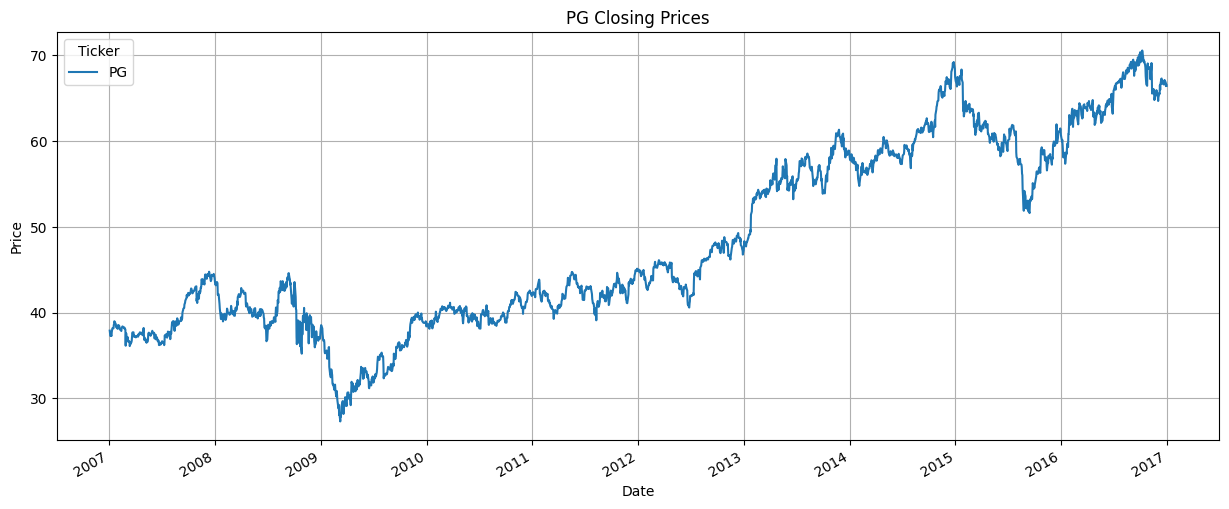

In [25]:
data.plot(figsize=(15, 6))
plt.title(f"{ticker} Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

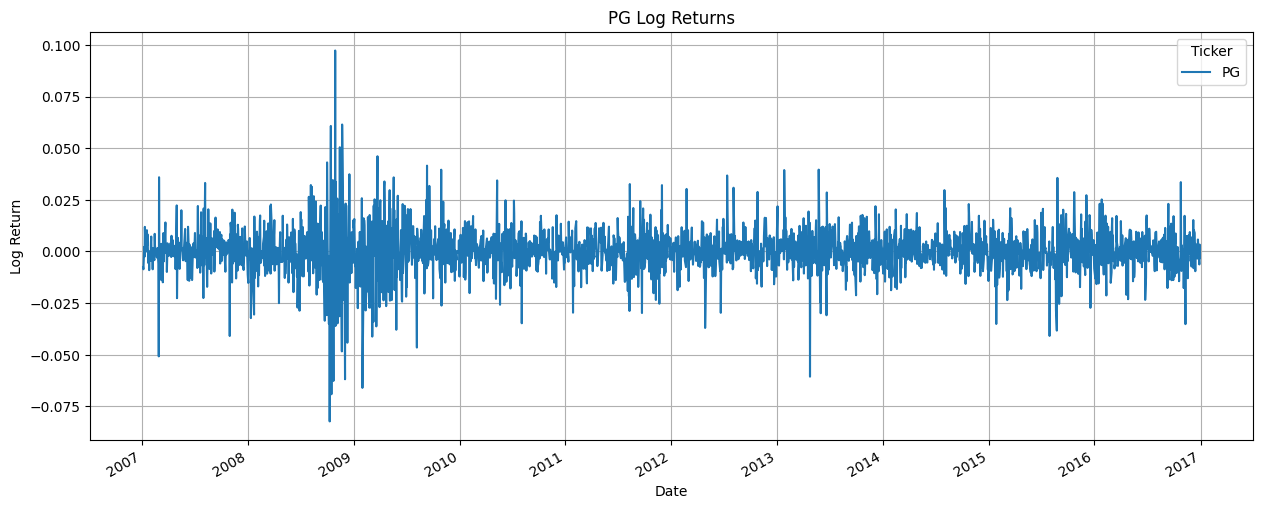

In [27]:
log_returns.plot(figsize=(15, 6))
plt.title(f"{ticker} Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid()
plt.show()

In [28]:
u = log_returns.mean()
u

Ticker
PG    0.000223
dtype: float64

In [29]:
var = log_returns.var()
var

Ticker
PG    0.000126
dtype: float64

In [30]:
drift = u - (0.5 * var)
drift

Ticker
PG    0.00016
dtype: float64

In [31]:
stdev = log_returns.std()
stdev

Ticker
PG    0.01122
dtype: float64